In [247]:
import pandas as pd

In [248]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data", header=None)

In [249]:
data[3].value_counts()

u    519
y    163
?      6
l      2
Name: 3, dtype: int64

In [250]:
import numpy as np
data = data.replace("?", np.nan)

In [251]:
data[3].value_counts()

u    519
y    163
l      2
Name: 3, dtype: int64

In [252]:
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        data[data.columns[i]] = data[data.columns[i]].astype("category").cat.codes
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())

In [263]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,68,0
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,11,560
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,96,824
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,31,3
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,37,0


In [253]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [254]:
from sklearn.linear_model import LogisticRegression

In [255]:
X = data.copy()
y = data.pop(15)

In [256]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [266]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [267]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [268]:
from sklearn.metrics import confusion_matrix

In [269]:
confusion_matrix(y_test, clf.predict(X_test))

array([[103,   0],
       [  0, 125]])

In [270]:
clf_lin =  LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [271]:
confusion_matrix(y_test, clf_lin.predict(X_test))

array([[ 92,  11],
       [  8, 117]])

In [272]:
# Extract single tree
estimator = clf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = "target",
                rounded = True, proportion = False, 
                precision = 2, filled = True)

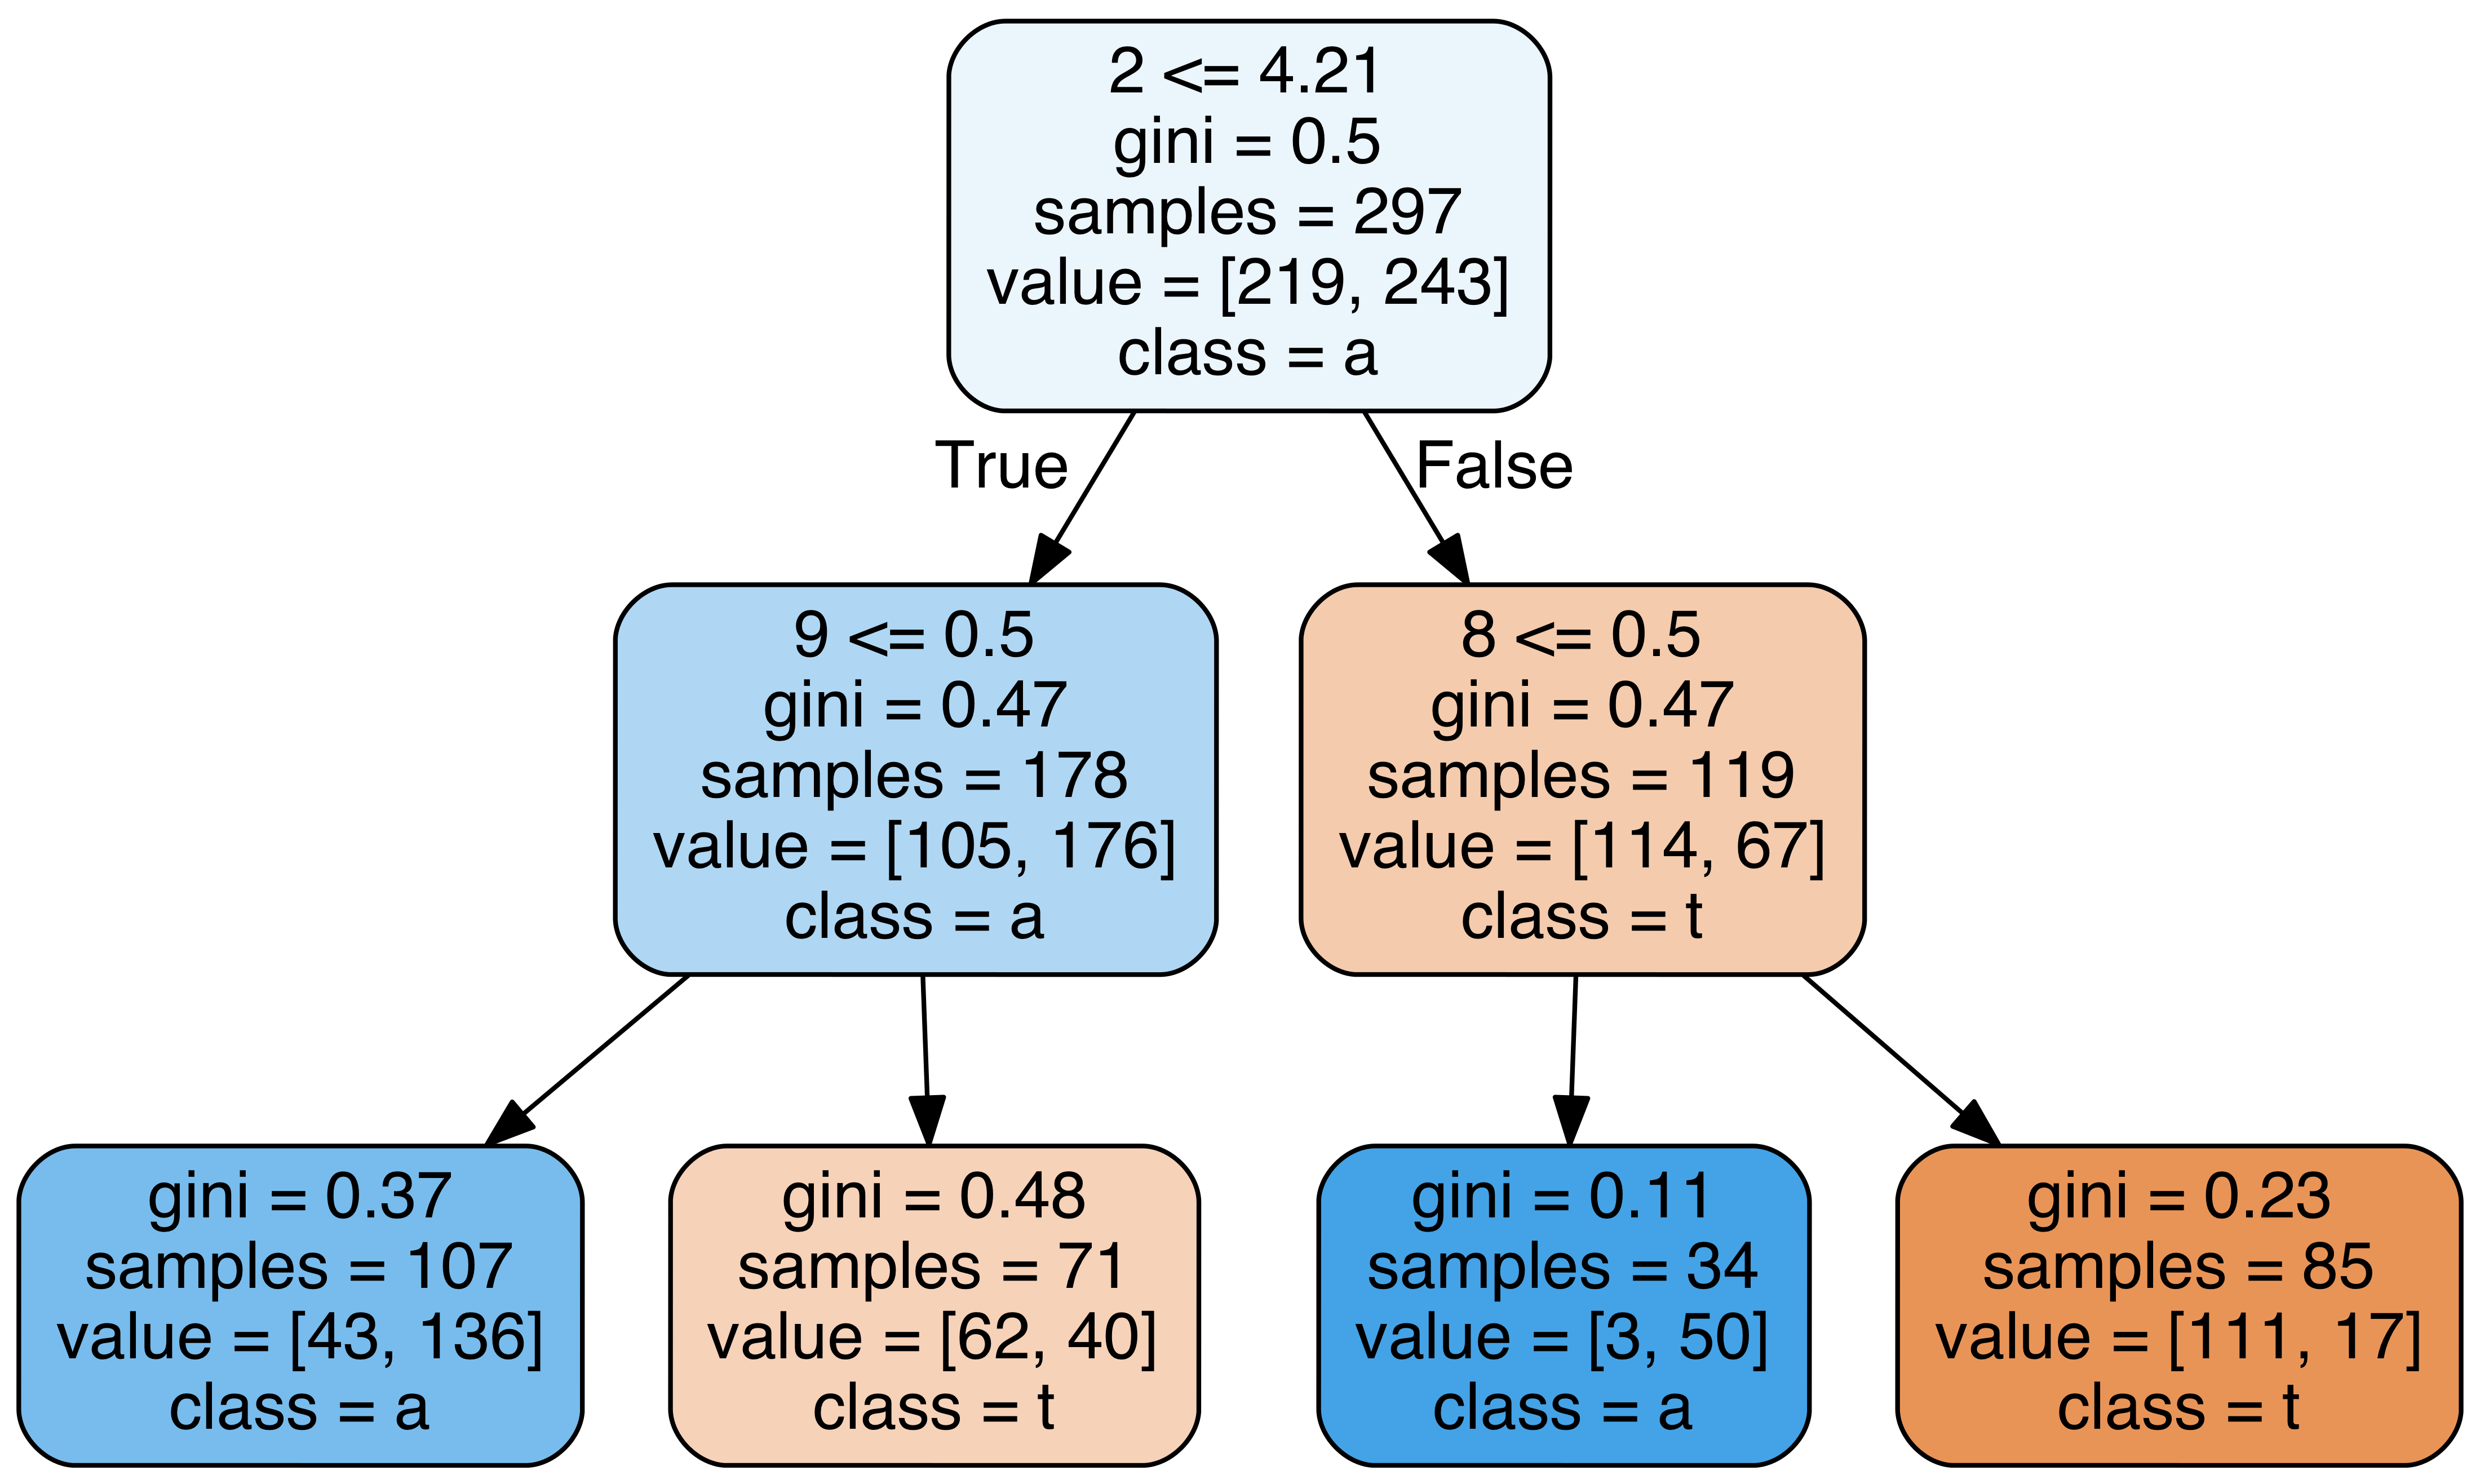

In [273]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')